# Imbalance Class

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn import metrics

## Load dataset

In [188]:
dataobj = load_breast_cancer()

X = pd.DataFrame(dataobj.data, columns=dataobj.feature_names)
y = dataobj.target

df = X
df['target'] = y

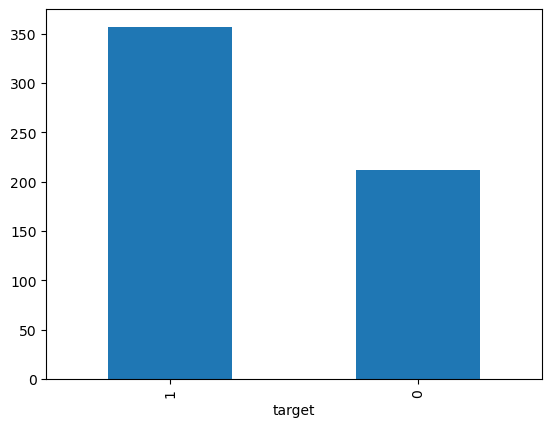

In [189]:
df.target.value_counts().plot(kind = 'bar');

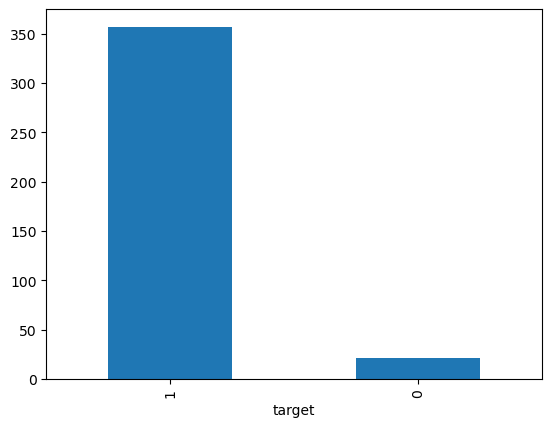

In [190]:
df0 = df[df.target==0].sample(frac=.1, random_state=1)
df1 = df[df.target==1]

df_im = pd.concat([df0, df1], axis=0)
df_im.target.value_counts().plot(kind='bar');

X = df_im.iloc[:, :len(df_im.columns) - 1]
y = df_im.target

# Split data

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=1, stratify=y)

# Pipline

In [192]:
scl = StandardScaler()
pca = PCA(n_components=.9)
clf = SVC(random_state=1)

pipe = Pipeline([
    ('scl', scl),
    ('pca', pca),
    ('clf', clf)
])

pipe

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('clf', SVC(random_state=1))])

## Grid Search CV

In [193]:
pipe.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('pca', PCA(n_components=0.9)),
  ('clf', SVC(random_state=1))],
 'verbose': False,
 'scl': StandardScaler(),
 'pca': PCA(n_components=0.9),
 'clf': SVC(random_state=1),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.9,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'clf__C': 1.0,
 'clf__break_ties': False,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'scale',
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': 1,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
params_range = [.0001, .001, .01, .1, 1, 10, 100, 1000]

set1 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['linear']
}

set2 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['poly']
}

set3 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['rbf']
}

param_grid = [set1, set2, set3]

In [196]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    scoring='f1',
    n_jobs=-1
)
gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']}],
             scoring='f1')

In [197]:
## fitting model
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']}],
             scoring='f1')

In [198]:
## Best Score and hyper parameter
print(f'Best F1 score = {gs.best_score_}')
print(f'Best hyperparameter = {gs.best_params_}')

Best F1 score = 0.9930419268510258
Best hyperparameter = {'clf__C': 0.0001, 'clf__gamma': 10, 'clf__kernel': 'poly'}


In [199]:
re = pd.DataFrame(gs.cv_results_)
re.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__gamma,param_clf__kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
95,0.003037,0.001770,0.002698,0.002865,0.1,1000,poly,"{'clf__C': 0.1, 'clf__gamma': 1000, 'clf__kern...",1.0,0.983051,...,1.0,1.0,0.982456,0.982456,0.982456,1.0,1.0,0.993042,0.008523,1
109,0.003145,0.002994,0.001774,0.001072,10,10,poly,"{'clf__C': 10, 'clf__gamma': 10, 'clf__kernel'...",1.0,0.983051,...,1.0,1.0,0.982456,0.982456,0.982456,1.0,1.0,0.993042,0.008523,1
108,0.002254,0.000546,0.001168,0.000204,10,1,poly,"{'clf__C': 10, 'clf__gamma': 1, 'clf__kernel':...",1.0,0.983051,...,1.0,1.0,0.982456,0.982456,0.982456,1.0,1.0,0.993042,0.008523,1
107,0.004127,0.002611,0.002072,0.001564,10,0.1,poly,"{'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel...",1.0,0.983051,...,1.0,1.0,0.982456,0.982456,0.982456,1.0,1.0,0.993042,0.008523,1
103,0.003130,0.001761,0.002077,0.001342,1,1000,poly,"{'clf__C': 1, 'clf__gamma': 1000, 'clf__kernel...",1.0,0.983051,...,1.0,1.0,0.982456,0.982456,0.982456,1.0,1.0,0.993042,0.008523,1


In [200]:
## refitting model
print(f'refitting model = {gs.refit}')

refitting model = True


# Evaluation metric

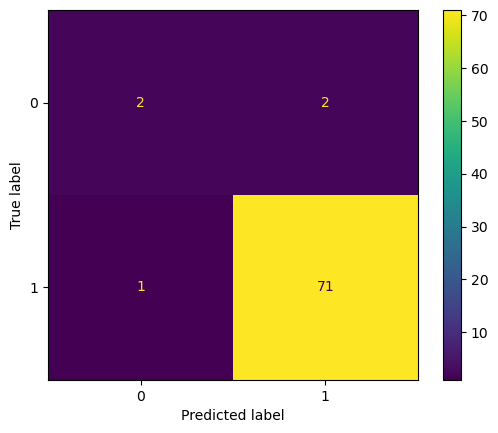

In [201]:
## confusion metrix
y_pred = gs.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot();

In [202]:
## Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.97      0.99      0.98        72

    accuracy                           0.96        76
   macro avg       0.82      0.74      0.78        76
weighted avg       0.96      0.96      0.96        76



# Using grid search for optimizing recall score

In [203]:
params_range = [.0001, .001, .01, .1, 1, 10, 100, 1000]

set1 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['linear']
}

set2 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['poly']
}

set3 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['rbf']
}

param_grid = [set1, set2, set3]

In [204]:
## changing scoring metric in grid Search
## and changing target label
from sklearn.metrics import make_scorer

scorer = make_scorer(metrics.recall_score, pos_label=0)

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    #changing target label
    scoring=scorer
)
gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']}],
             scoring=make_scorer(recall_score, pos_label=0))

In [205]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']}],
             scoring=make_scorer(recall_score, pos_label=0))

In [206]:
## Best Score and hyper parameter
print(f'Best Recall score = {gs.best_score_}')
print(f'Best hyperparameter = {gs.best_params_}')

Best Recall score = 0.85
Best hyperparameter = {'clf__C': 100, 'clf__gamma': 0.0001, 'clf__kernel': 'linear'}


In [211]:
re = pd.DataFrame(gs.cv_results_)
re.sort_values('rank_test_score').head()
#gs.refit

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__gamma,param_clf__kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
178,0.002919,0.001442,0.001680,0.000637,100,0.01,rbf,"{'clf__C': 100, 'clf__gamma': 0.01, 'clf__kern...",1.0,0.5,...,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.85,0.229129,1
50,0.004419,0.001809,0.002848,0.001443,100,0.01,linear,"{'clf__C': 100, 'clf__gamma': 0.01, 'clf__kern...",1.0,1.0,...,1.0,1.0,0.5,1.0,0.5,1.0,0.5,0.85,0.229129,1
49,0.003162,0.001458,0.001712,0.000923,100,0.001,linear,"{'clf__C': 100, 'clf__gamma': 0.001, 'clf__ker...",1.0,1.0,...,1.0,1.0,0.5,1.0,0.5,1.0,0.5,0.85,0.229129,1
48,0.004017,0.002161,0.001945,0.001062,100,0.0001,linear,"{'clf__C': 100, 'clf__gamma': 0.0001, 'clf__ke...",1.0,1.0,...,1.0,1.0,0.5,1.0,0.5,1.0,0.5,0.85,0.229129,1
53,0.002947,0.001257,0.001104,0.000119,100,10,linear,"{'clf__C': 100, 'clf__gamma': 10, 'clf__kernel...",1.0,1.0,...,1.0,1.0,0.5,1.0,0.5,1.0,0.5,0.85,0.229129,1


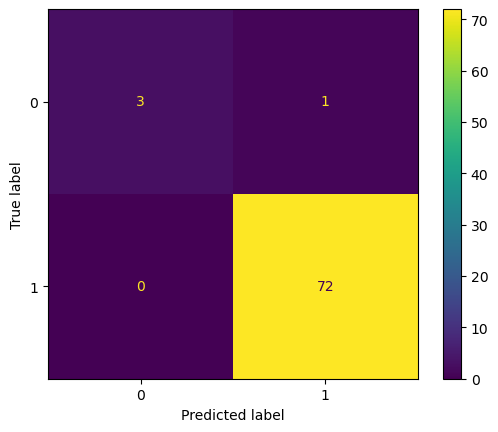

In [208]:
## confusion metrix
y_pred = gs.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot();

In [209]:
## Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.99      1.00      0.99        72

    accuracy                           0.99        76
   macro avg       0.99      0.88      0.93        76
weighted avg       0.99      0.99      0.99        76



# Chaning class weight

In [218]:
scl = StandardScaler()
pca = PCA(n_components=.9)
clf = SVC(random_state=1, class_weight='balanced')

pipe = Pipeline([
    ('scl', scl),
    ('pca', pca),
    ('clf', clf)
])


In [219]:
params_range = [.0001, .001, .01, .1, 1, 10, 100, 1000]

set1 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['linear']
}

set2 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['poly']
}

set3 = {
    'clf__C' : params_range,
    'clf__gamma' : params_range,
    'clf__kernel' : ['rbf']
}

param_grid = [set1, set2, set3]

In [223]:
## changing scoring metric in grid Search
## and changing target label
from sklearn.metrics import make_scorer

scorer = make_scorer(metrics.f1_score, pos_label=0)

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    #changing target label
    scoring=scorer
)
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf',
                                        SVC(class_weight='balanced',
                                            random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']}],
             scoring=make_scorer(f1_score, pos_label=0))

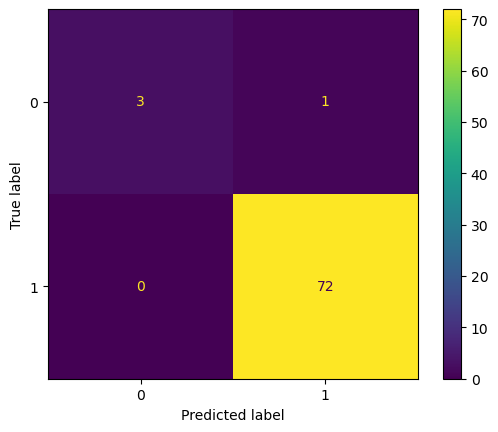

In [224]:
## confusion metrix
y_pred = gs.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot();

In [225]:
## Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.99      1.00      0.99        72

    accuracy                           0.99        76
   macro avg       0.99      0.88      0.93        76
weighted avg       0.99      0.99      0.99        76



# Using SMOTE for imblance classificaiton

# Over Sampling

In [227]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='target'>

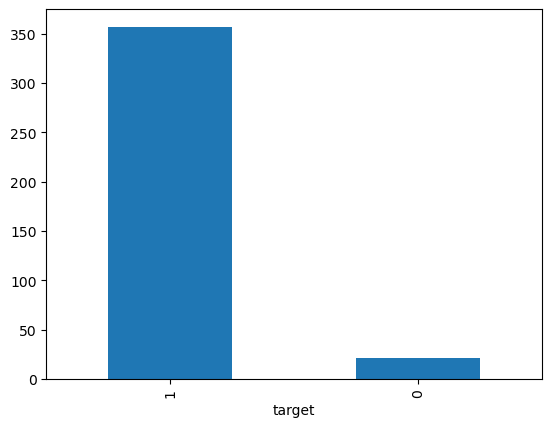

In [229]:
pd.Series(y).value_counts().plot(kind='bar')

In [228]:
from imblearn.over_sampling import SMOTE

<Axes: xlabel='target'>

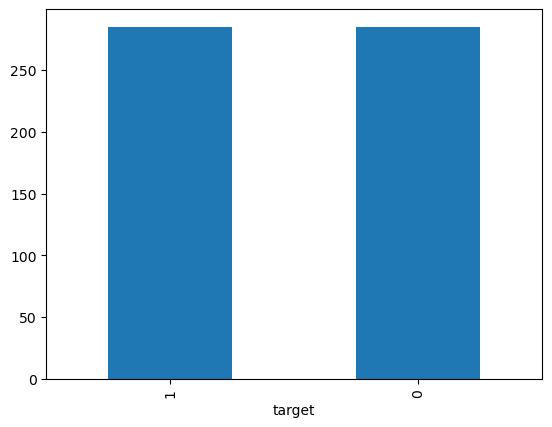

In [232]:
oversample = SMOTE()
X_train_osm, y_train_osm = oversample.fit_resample(X_train, y_train)
pd.Series(y_train_osm).value_counts().plot(kind ='bar')

In [233]:
gs.fit(X_train_osm, y_train_osm)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf',
                                        SVC(class_weight='balanced',
                                            random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']}],
             scoring=make_scorer(f1_score, pos_label=0))

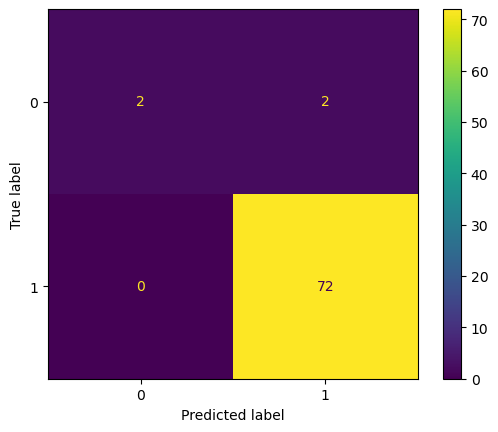

In [236]:
y_pred = gs.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot()

In [238]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.97      1.00      0.99        72

    accuracy                           0.97        76
   macro avg       0.99      0.75      0.83        76
weighted avg       0.97      0.97      0.97        76

